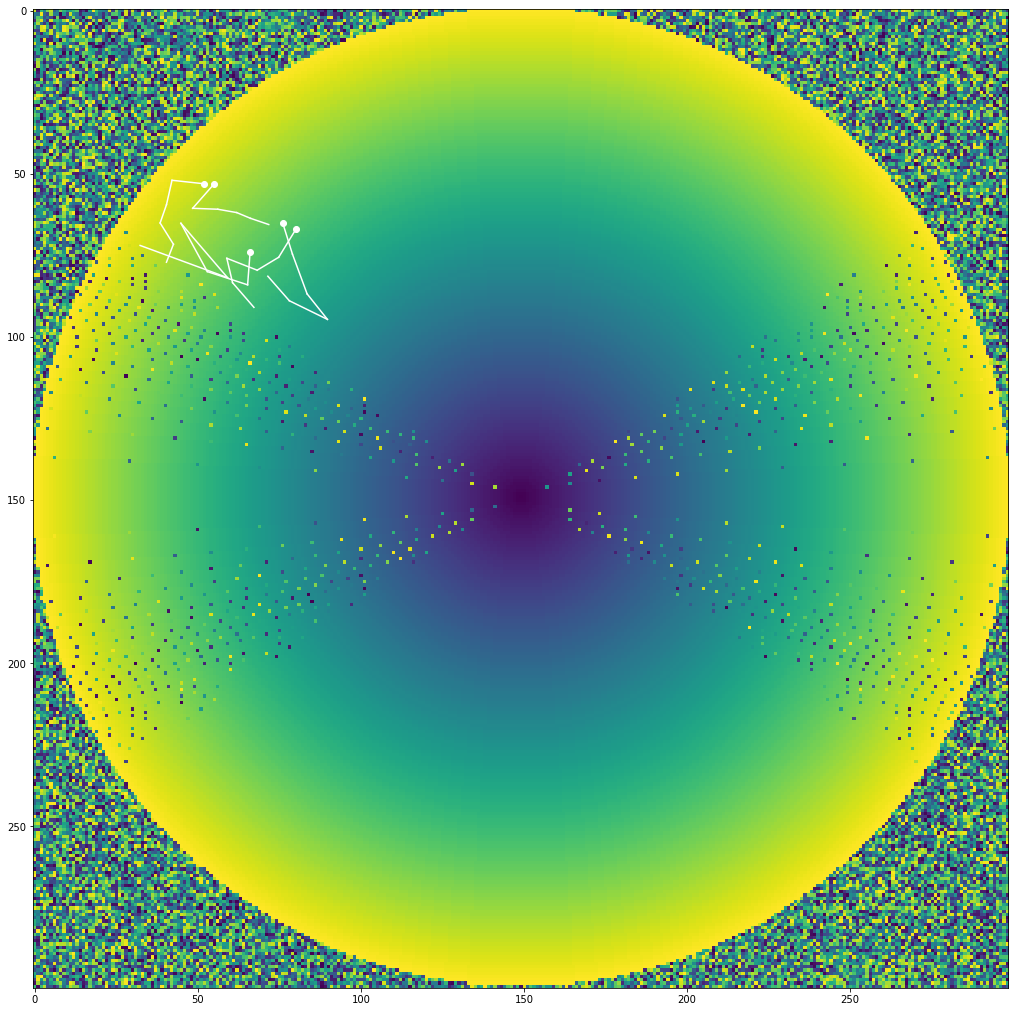

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.lines
import random
from numpy import random as rdn



N = 5 # количесвто итераций
m = 5 # количество тел
tt = np.zeros(m)
for i in range (m):
  tt[i] = 2
ww = 2  #скорости круговая с линейной
vv = 5

data_int2 = rdn.rand(300,299)


def aa(w, v, x, y, t):
  t1 = random.uniform(0, t)
  x = x + v * t * np.cos(w*t1)
  y = y + v * t * np.sin(w*t1)

  return x % 290, y % 290

def b(i, j, t):
  if (data_int2[i][j] >= data_int2[i+1][j]):
    t1 = t / 1.3
  if (data_int2[i][j] < data_int2[i+1][j]):
    t1 = t * 1.3
  return t1

tmp = np.linspace(0, 1, 150)
data_int2[150][150] = tmp[0]


for j in range (0,150):
  a = 0
  R = j
  y = j
  delta = 1 - 2 * R
  errr = 0
  while (y >= 0):
    data_int2[149 + a][149 + y] = tmp[j]
    data_int2[149 - a][149 + y] = tmp[j]
    data_int2[149 - a][149 - y] = tmp[j]
    data_int2[149 + a][149 - y] = tmp[j]                                
    error = 2 * (delta + y) - 1
    if ((delta < 0) and (error <= 0)):
      a = a +1
      delta += 2 * a + 1
      continue
    if ((delta > 0) and (error > 0)):
      y = y - 1
      delta -= 2 * y + 1
      continue
    a = a + 1
    y = y - 1
    delta += 2 * (a - y)



x = rdn.rand(N+1, m)
y = rdn.rand(N+1, m)
for i in range(m):
  x[0][i] = random.randint(50, 90)    #  x - координаты точек
  y[0][i] = random.randint(50, 90)    #  y - координаты точек

fig, ax = plt.subplots()
ax.imshow(data_int2)
for i in range (m):
  ax.scatter(x[0][i], y[0][i],
           c = 'white')    #  цвет точек


for i in range (N):
  for j in range (m):
    x[i+1][j], y[i+1][j] = aa(ww, vv, x[i][j], y[i][j], tt[j])
    tt[j] = b(i, j, tt[j]) 

    if (0 <= x[i+1][j] <= 299 and 0 <= y[i+1][j] <= 299):
      line = matplotlib.lines.Line2D ([x[i][j], x[i+1][j]], [y[i][j], y[i+1][j]], color="w")
      ax.add_line (line)







fig.set_figwidth(18)     #  ширина и
fig.set_figheight(18)    #  высота "Figure"

plt.show()